In [2]:
from pathlib import Path
import re
from collections import Counter

In [4]:
file_path = Path("C:/Users/Lokesh/Desktop/Oasis Infobite/Task 9/corpus.txt")

In [6]:
with open(file_path, "r", encoding="utf-8") as file:
    file_content = file.read()

words = re.findall(r'\w+', file_content.lower())

V = set(words)

V_list = list(V)

ten_words = words[:10]

print("Vocabulary:", V_list[:10])
print("First ten words:", ten_words)

Vocabulary: ['ladas', 'horrors', 'soufans', 'commutator', 'insy', '提供各受评机构相对信用品质指标', 'pummelled', 'laskowski', 'fairlife', 'deluge']
First ten words: ['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of']


In [8]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [10]:
nltk.download('stopwords')

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Filter out non-alphabetic words and stop words
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Count the frequency of each filtered word
word_freq = Counter(filtered_words)

# Retrieve the ten most common filtered words and their frequencies
most_common_txt = word_freq.most_common(10)

print("Ten most common filtered words and their frequencies:", most_common_txt)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lokesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ten most common filtered words and their frequencies: [('said', 92757), ('year', 41224), ('u', 32389), ('new', 31782), ('would', 31604), ('company', 31282), ('percent', 28673), ('also', 26696), ('one', 25712), ('reuters', 25306)]


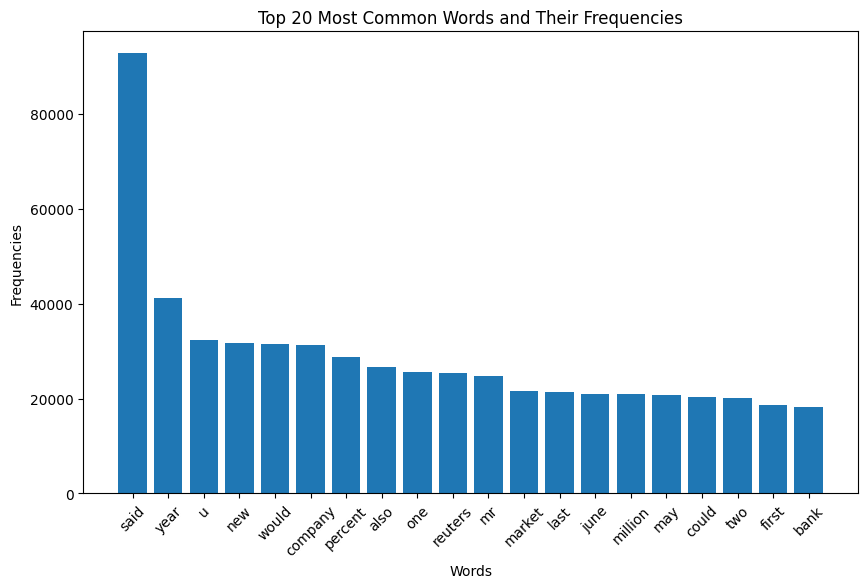

In [12]:
import matplotlib.pyplot as plt

most_common_20 = word_freq.most_common(20)

# Unpack 'most_common_20' into separate lists 'words' and 'frequencies' using the zip() function
words, frequencies = zip(*most_common_20)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 20 Most Common Words and Their Frequencies')
plt.xticks(rotation=45)
plt.show()

In [14]:
probs = {}

total = sum(word_freq.values())

# Calculate the probability of each word
for word, freq in word_freq.items():
    probs[word] = freq / total

print("Word Probabilities:")
for word, prob in list(probs.items())[:10]:
    print(word, ":", prob)

Word Probabilities:
fulton : 3.0719806417958327e-06
county : 0.0001091734658853596
grand : 9.29864909651277e-05
jury : 6.273929695359951e-05
said : 0.010959527245809848
friday : 0.0008859119558532751
investigation : 0.00042381517546621737
atlanta : 6.273929695359951e-05
recent : 0.0007981242013588788
primary : 0.00011909832642039228


In [16]:
!pip install textdistance

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import textdistance
import pandas as pd

def my_autocorrect(input_word):
    input_word = input_word.lower()  # Convert the input word to lowercase
    
    # Check if the input word is in the vocabulary
    if input_word in V:
        return 'Your word seems to be correct'
    
    # Calculate similarity scores using Jaccard distance
    similarity_scores = {word: textdistance.jaccard(input_word, word) for word in word_freq.keys()}
    
    # Create a DataFrame from the probabilities and similarity scores
    df = pd.DataFrame({'Word': list(probs.keys()), 'Prob': list(probs.values()), 'Similarity': list(similarity_scores.values())})
    
    # Sort the DataFrame by 'Similarity' and 'Prob' in descending order
    df = df.sort_values(by=['Similarity', 'Prob'], ascending=[False, False])
    
    return df.head()

# Call the 'my_autocorrect' function with an example input
suggestion_words = my_autocorrect('neverteless')

print("Top suggestions based on similarity and probability:")
print(suggestion_words)

Top suggestions based on similarity and probability:
                 Word          Prob  Similarity
159      nevertheless  3.615485e-05    0.916667
84573       enervests  5.907655e-07    0.818182
24128       nerveless  1.181531e-07    0.818182
78574  reflectiveness  2.363062e-07    0.785714
94238    teleservices  7.089186e-07    0.769231


In [20]:
import textdistance

def correction_suggestion(word):
    word = word.lower()
    
    # Check if the word is in the vocabulary
    if word in V:
        return word
    
    # If the word is not in the vocabulary, find suggestions based on Levenshtein normalized similarity
    suggestions = [w for w in V if textdistance.levenshtein.normalized_similarity(word, w) > 0.7]
    
    # Return the first suggestion from the list if suggestions exist, otherwise return None
    if suggestions:
        return suggestions[0]
    else:
        return None

result = correction_suggestion('kidness')

print("Corrected word suggestion:", result)

Corrected word suggestion: wildness
